In [1]:
import os
import time

start = time.time()
if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [2]:
import json
import random
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.models as gm
from tqdm import tqdm
from gensim.models import KeyedVectors
import seaborn as sns
%load_ext memory_profiler

from badseeds import replicate_bolukbasi
from badseeds import utils, seedbank, metrics


In [3]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [4]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [5]:
# for replicability
np.random.seed(42)
random.seed(42)

## Models and Data

### Models

In [6]:
%%memit
models = []

# load google news word2vec
# Load vectors directly from the file
models.append(
    KeyedVectors.load_word2vec_format(
        os.path.join(
            config["models"]["dir_path"], config["models"]["google_news_subpath"]
        )
        + ".bin",
        binary=True,
    )
)

# direct = os.fsencode(
#     os.path.join(
#         config["models"]["dir_path"], config["models"]["nyt_subpath"]["10"]
#     )
# )

# for filename in os.listdir(direct):
#     print(filename)
#     f = os.path.join(direct, filename)

#     # checking if it is a file
#     if os.path.isfile(f):
#         f = os.fsdecode(f)
#         models.append(KeyedVectors.load(f))

peak memory: 4363.29 MiB, increment: 3941.23 MiB


### Seeds

In [7]:
%%memit
# get desired seeds:

seed = seedbank.seedbanking(config["seeds"]["dir_path"] + "seeds.json", index="ID")

seed_genres = ["gender pairs", "social class pairs", "chinese-hispanic name pairs"]

seed_list = [
    [
        "definitional_female-Bolukbasi_et_al_2016",
        "definitional_male-Bolukbasi_et_al_2016",
    ],
    [
        "upperclass-Kozlowski_et_al_2019",
        "lowerclass-Kozlowski_et_al_2019",
    ],
    [
        "names_chinese-Garg_et_al_2018",
        "names_hispanic-Garg_et_al_2018",
    ],
]

# hard coded shuffled seeds from appendix of the oirginal paper

shuffled_seeds = [
    [
        [
            "herself",
            "woman",
            "daughter",
            "Mary",
            "her",
            "girl",
            "mother",
            "she",
            "female",
            "gal",
        ],
        [
            "man",
            "his",
            "he",
            "son",
            "guy",
            "himself",
            "father",
            "boy",
            "male",
            "John",
        ],
    ],
    [
        [
            "richer",
            "opulent",
            "luxury",
            "affluent",
            "rich",
            "affluence",
            "richest",
            "expensive",
        ],
        [
            "poorer",
            "impoverished",
            "poorest",
            "cheap",
            "needy",
            "poverty",
            "inexpensive",
            "poor",
        ],
    ],
    [
        [
            "tang",
            "chang",
            "chu",
            "yang",
            "wu",
            "hong",
            "huang",
            "wong",
            "hu",
            "liu",
            "lin",
            "chen",
            "liang",
            "chung",
            "li",
            "ng",
            "wang",
        ],
        [
            "ruiz",
            "rodriguez",
            "diaz",
            "perez",
            "lopez",
            "vargas",
            "alvarez",
            "garcia",
            "cruz",
            "torres",
            "gonzalez",
            "soto",
            "martinez",
            "medina",
            "rivera",
            "castillo",
            "castro",
            "mendoza",
            "sanchez",
            "gomez",
        ],
    ],
]


peak memory: 4366.04 MiB, increment: 2.63 MiB


### Visualization and Function call

"Key 'ruiz' not present"
"Key 'alvarez' not present"
"Key 'vargas' not present"
"Key 'mendoza' not present"
"Key 'ruiz' not present"
"Key 'vargas' not present"
"Key 'alvarez' not present"


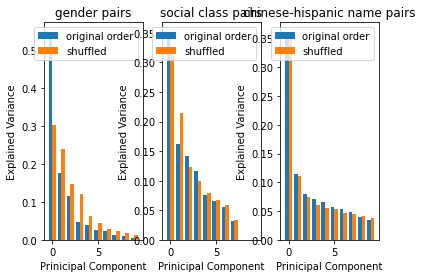

peak memory: 4370.12 MiB, increment: 4.08 MiB


In [8]:
%%memit

x = np.arange(10)
width = 0.4
fig, axes = plt.subplots(1, 3)

# for row in axes
for idx, ax in enumerate(axes):

    # lower case seeds? she didnt do it in appendix (doesnt make sense tho)
    seed_lists = [seed.loc[seed_set]["Seeds"] for seed_set in seed_list[idx]]
    seed1 = [item.lower() for item in seed_lists[0]]
    seed2 = [item.lower() for item in seed_lists[1]]

    seed1_shuf = (shuffled_seeds[idx])[0]
    seed2_shuf = (shuffled_seeds[idx])[1]

    variance_ordered, variance_rnd, variance_inshuffle = replicate_bolukbasi.pca_seeds_model(
        seed1, seed2, models, seed1_shuf, seed2_shuf
    )

    ax.bar(
        x - 0.2,
        np.mean(variance_ordered, axis=0),
        width,
        yerr=np.std(variance_ordered, axis=0),
        label="original order",
    )

    ax.bar(
        x + 0.2,
        np.mean(variance_inshuffle, axis=0),
        width,
        yerr=np.std(variance_inshuffle, axis=0),
        label="shuffled",
    )
    ax.legend()
    ax.set_xlabel("Prinicipal Component")
    ax.set_ylabel("Explained Variance")
    ax.set_title(seed_genres[idx])
plt.show()

In [9]:
print("Time taken is: ", time.time() - start)

Time taken is:  19.239455938339233
